In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os,shutil

In [4]:
original_data='/content/gdrive/My Drive/Data for DL/Data for DL'

In [5]:
base_dir='/content/mini_pro'

In [6]:
os.mkdir(base_dir)

In [7]:
train_dir=os.path.join(base_dir,'train')

In [8]:
os.mkdir(train_dir)

In [9]:
validation_dir=os.path.join(base_dir,'validation')

In [10]:
os.mkdir(validation_dir)

In [11]:
test_dir=os.path.join(base_dir,'test')

In [12]:
os.mkdir(test_dir)

In [13]:
train_drone_dir=os.path.join(train_dir,'drone')
os.mkdir(train_drone_dir)

In [14]:
train_fighter_jet_dir=os.path.join(train_dir,'fighter_jet')
os.mkdir(train_fighter_jet_dir)

In [15]:
train_helicopter_dir=os.path.join(train_dir,'helicopter')
os.mkdir(train_helicopter_dir)

In [16]:
train_missile_dir=os.path.join(train_dir,'missile')
os.mkdir(train_missile_dir)

In [17]:
train_passenger_plane_dir=os.path.join(train_dir,'passenger_plane')
os.mkdir(train_passenger_plane_dir)

In [18]:
train_rocket_dir=os.path.join(train_dir,'rocket')
os.mkdir(train_rocket_dir)

In [19]:
validation_drone_dir=os.path.join(validation_dir,'drone')
os.mkdir(validation_drone_dir)

In [20]:
validation_fighter_jet_dir=os.path.join(validation_dir,'fighter_jet')
os.mkdir(validation_fighter_jet_dir)

In [21]:
validation_helicopter_dir=os.path.join(validation_dir,'helicopter')
os.mkdir(validation_helicopter_dir)

In [22]:
validation_missile_dir=os.path.join(validation_dir,'missile')
os.mkdir(validation_missile_dir)

In [23]:
validation_passenger_plane_dir=os.path.join(validation_dir,'passenger_plane')
os.mkdir(validation_passenger_plane_dir)

In [24]:
validation_rocket_dir=os.path.join(validation_dir,'rocket')
os.mkdir(validation_rocket_dir)

In [25]:
test_drone_dir=os.path.join(test_dir,'drone')
os.mkdir(test_drone_dir)

In [26]:
test_fighter_jet_dir=os.path.join(test_dir,'fighter_jet')
os.mkdir(test_fighter_jet_dir)

In [27]:
test_helicopter_dir=os.path.join(test_dir,'helicopter')
os.mkdir(test_helicopter_dir)

In [28]:
test_missile_dir=os.path.join(test_dir,'missile')
os.mkdir(test_missile_dir)

In [29]:
test_passenger_plane_dir=os.path.join(test_dir,'passenger_plane')
os.mkdir(test_passenger_plane_dir)

In [30]:
test_rocket_dir=os.path.join(test_dir,'rocket')
os.mkdir(test_rocket_dir)


In [31]:
names=['drone','fighter_jet','helicopter','missile','passenger_plane','rocket']

In [32]:
train_list=['/content/mini_pro/train/{}'.format(name) for name in names]
validation_list=['/content/mini_pro/validation/{}'.format(name) for name in names]
test_list=['/content/mini_pro/test/{}'.format(name) for name in names]


In [33]:
l_dir=['/content/gdrive/My Drive/Data for DL/Data for DL/drone','/content/gdrive/My Drive/Data for DL/Data for DL/fighter-jet'
         ,'/content/gdrive/My Drive/Data for DL/Data for DL/helicopter'
         ,'/content/gdrive/My Drive/Data for DL/Data for DL/missile',
         '/content/gdrive/My Drive/Data for DL/Data for DL/passenger-plane','/content/gdrive/My Drive/Data for DL/Data for DL/rocket']

In [34]:
fn0=[]
fn1=[]
fn2=[]
fn3=[]
fn4=[]
fn5=[]
b=[fn0,fn1,fn2,fn3,fn4,fn5]

In [35]:
for i in range(6):
    b[i]=os.listdir(l_dir[i])

In [36]:
for i in range(6):
  for fname in range(int((len(b[i]))*0.5)):
    src = os.path.join(l_dir[i], b[i][fname])
    dst = os.path.join(train_list[i], b[i][fname])
    shutil.copyfile(src, dst)

  for fname in range(int((len(b[i]))*0.5),int((len(b[i]))*0.75)):
    src = os.path.join(l_dir[i], b[i][fname])
    dst = os.path.join(validation_list[i], b[i][fname])
    shutil.copyfile(src, dst)

  for fname in range(int((len(b[i]))*0.75),int(len(b[i]))):
    src = os.path.join(l_dir[i],b[i][fname])
    dst = os.path.join(test_list[i],b[i][fname])
    shutil.copyfile(src, dst)
  

In [37]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

from tensorflow.keras.applications import VGG16

In [38]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 0s 0us/step


In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [40]:
 conv_base.trainable = False

In [41]:
model = Sequential()
model.add(conv_base)

model.add(Conv2D(filters=600, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Dropout(0.5))
model.add(Conv2D(filters=600, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Dropout(0.5))
model.add(Conv2D(filters=600, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())


model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=6, activation="sigmoid"))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 600)         2765400   
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 600)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 600)         3240600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 600)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 600)         3240600   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 600)         0

In [43]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
 zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255) 

In [44]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [75]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')
history = model.fit_generator(train_generator,steps_per_epoch=50,epochs=50,validation_data=validation_generator,validation_steps=25)

Found 4218 images belonging to 6 classes.
Found 2112 images belonging to 6 classes.
Epoch 1/50
50/50 [==============================] - 31s 617ms/step - loss: 0.9514 - acc: 0.6320 - val_loss: 1.0378 - val_acc: 0.6720
Epoch 2/50
50/50 [==============================] - 30s 603ms/step - loss: 0.9196 - acc: 0.6590 - val_loss: 1.1168 - val_acc: 0.6380
Epoch 3/50
50/50 [==============================] - 30s 606ms/step - loss: 0.9053 - acc: 0.6633 - val_loss: 1.0126 - val_acc: 0.6760
Epoch 4/50
50/50 [==============================] - 31s 622ms/step - loss: 0.9402 - acc: 0.6470 - val_loss: 1.1759 - val_acc: 0.6340
Epoch 5/50
50/50 [==============================] - 30s 609ms/step - loss: 0.9571 - acc: 0.6610 - val_loss: 1.4622 - val_acc: 0.6080
Epoch 6/50
50/50 [==============================] - 29s 580ms/step - loss: 0.9598 - acc: 0.6603 - val_loss: 1.2279 - val_acc: 0.6280
Epoch 7/50
50/50 [==============================] - 31s 612ms/step - loss: 0.9053 - acc: 0.6550 - val_loss: 1.1187 - v

In [76]:
history.history['acc']

[0.6320000290870667,
 0.6589999794960022,
 0.6633266806602478,
 0.6470000147819519,
 0.6610000133514404,
 0.6603206396102905,
 0.6549999713897705,
 0.6510000228881836,
 0.6639999747276306,
 0.656000018119812,
 0.6299999952316284,
 0.671342670917511,
 0.640999972820282,
 0.6549999713897705,
 0.6470000147819519,
 0.6673346757888794,
 0.640999972820282,
 0.6809999942779541,
 0.6499999761581421,
 0.6549999713897705,
 0.6600000262260437,
 0.6840000152587891,
 0.6949999928474426,
 0.6439999938011169,
 0.6600000262260437,
 0.6909999847412109,
 0.6779999732971191,
 0.6650000214576721,
 0.6613226532936096,
 0.6763526797294617,
 0.6593186259269714,
 0.6439999938011169,
 0.6813627481460571,
 0.6589999794960022,
 0.6589999794960022,
 0.6729999780654907,
 0.6510000228881836,
 0.6639999747276306,
 0.671999990940094,
 0.6813627481460571,
 0.6790000200271606,
 0.6700000166893005,
 0.6800000071525574,
 0.6790000200271606,
 0.6399999856948853,
 0.6733466982841492,
 0.6660000085830688,
 0.685000002384185

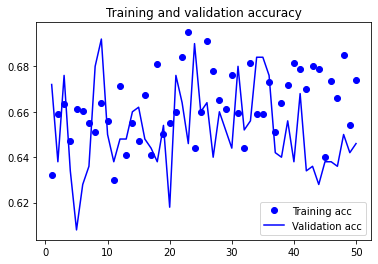

In [77]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()



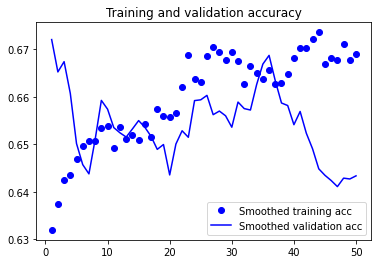

In [78]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 -factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
 smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
 smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()


In [79]:
test_gen= test_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')

test_loss, test_acc = model.evaluate(test_gen,steps=50)

Found 2114 images belonging to 6 classes.
50/50 [==============================] - 17s 345ms/step - loss: 1.4300 - acc: 0.5240


In [80]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')

Found 2112 images belonging to 6 classes.


In [81]:
val_len=0
for i in range(6):
  val_len=val_len+int((len(b[i]))*0.75)-int((len(b[i]))/2) 


In [82]:
val_len

2139

In [83]:


from sklearn.metrics import confusion_matrix
import numpy as np
batch_size=20



prob=model.predict_generator(validation_generator,val_len//batch_size+1)
y_pred=np.argmax(prob,axis=1)
y_true=validation_generator.classes

c = confusion_matrix(y_true, y_pred)
print('confusion matrix')
print(c)
 

confusion matrix
[[ 46  75  55  54  85  16]
 [ 75  92  77  77 119  22]
 [ 49  89  50  55  77  21]
 [ 56  92  51  43  72  17]
 [ 63  88  49  55  82  17]
 [ 45  79  42  50  68   9]]
